In [67]:
import pandas as pd
movies = pd.read_csv("/home/leong/Desktop/Netflix/netflix_titles.csv")

movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [68]:
movies.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [69]:
#handle missung data

# 1) handle missing director by filling all NAN vals with "unknown Director"
movies['director'].fillna("unknown Director", inplace= True)

# 2) handle missing cast by filling all NAN vals with "unknown cast"
movies['cast'].fillna("unknown cast", inplace= True)

# 3) handle missing counrtry by filling all NAN vals with "unknown country"
movies['country'].fillna("unknown country", inplace= True)

# 4) handle missing date by filling all NAN vals with mode(most occuring data)
movies['date_added'].fillna(movies['date_added'].mode()[0], inplace= True)

# 5) handle missing rating by filling all NAN vals with the column mode
movies['rating'].fillna(movies['rating'].mode()[0], inplace= True)


In [70]:
movies.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Exploratory data analysis

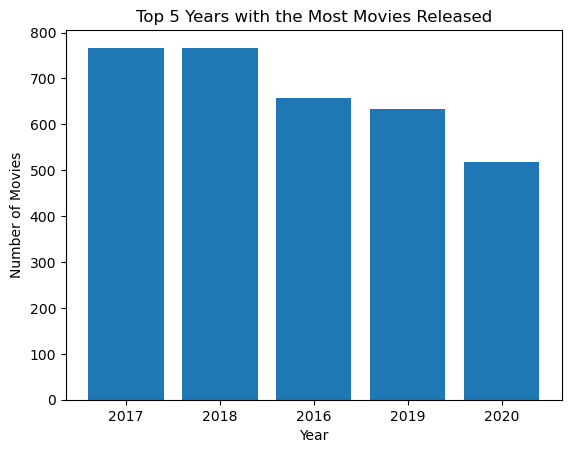

In [71]:
import matplotlib.pyplot as plt

# Visualizing the top 5 years with the most movies released
data = movies[movies['type'] == 'Movie']

# Grouping by release year and count the number of movies
movies_per_year = data['release_year'].value_counts().sort_index()
top_5_years = movies_per_year.nlargest(5)

# Plot
plt.bar(top_5_years.index.astype(str), top_5_years.values)
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title("Top 5 Years with the Most Movies Released")
plt.show()

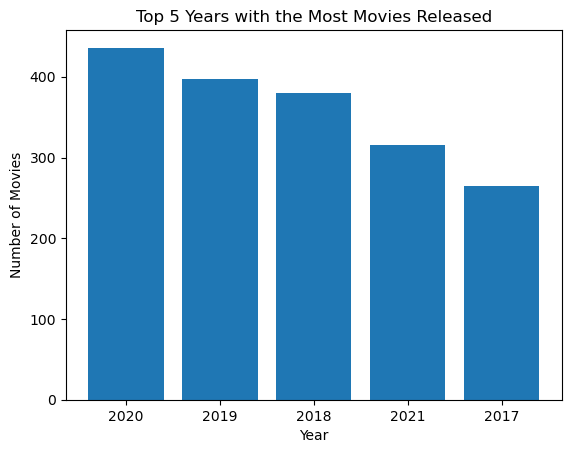

In [72]:
# Visualizing the top 5 years with the most TV Shows released
data = movies[movies['type'] == 'TV Show']

# Grouping by release year and count the number of movies
shows_per_year = data['release_year'].value_counts().sort_index()
top_5_years = shows_per_year.nlargest(5)

# Plot
plt.bar(top_5_years.index.astype(str), top_5_years.values)
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title("Top 5 Years with the Most Movies Released")
plt.show()

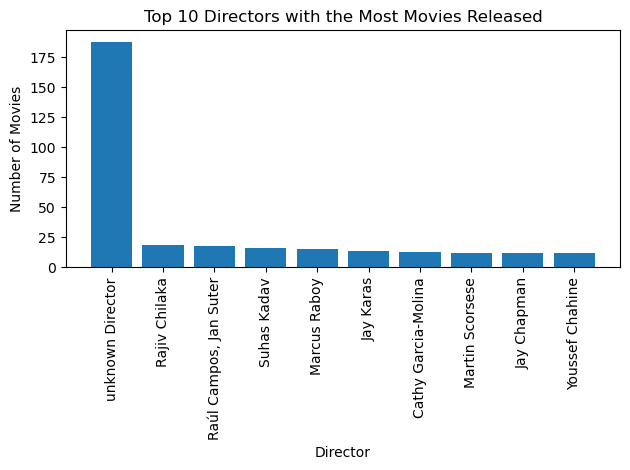

In [73]:
#10 directros with the highest movie nmbers

# Filter the dataset to include only movies
datas = movies[movies['type'] == 'Movie']


# Group movies by director and count the number of movies
movies_directors = datas['director'].value_counts().head(10)

# Create a bar plot 
plt.bar(movies_directors.index, movies_directors.values)
plt.xlabel("Director")
plt.ylabel("Number of Movies")
plt.title("Top 10 Directors with the Most Movies Released")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

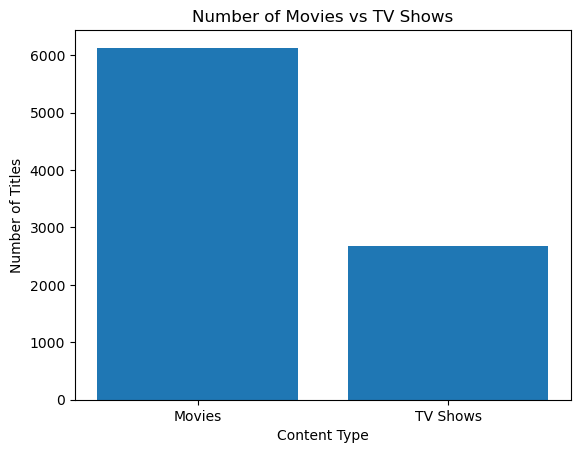

In [74]:
#number of movies vs number of TV Shows

# Count number of movies and TV shows
count_movies = movies[movies['type'] == 'Movie'].shape[0]
count_tv_shows = movies[movies['type'] == 'TV Show'].shape[0]

# Create bar plot to visualize comparison
plt.bar(['Movies', 'TV Shows'], [count_movies, count_tv_shows])
plt.xlabel("Content Type")
plt.ylabel("Number of Titles")
plt.title("Number of Movies vs TV Shows")
plt.show()

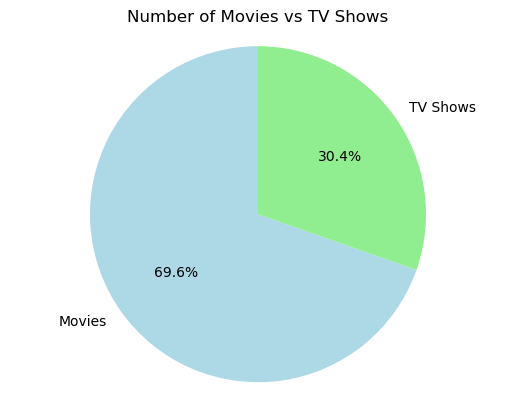

In [75]:
# Create a pie chart to visualize the comparison
labels = ['Movies', 'TV Shows']
sizes = [count_movies, count_tv_shows]
colors = ['lightblue', 'lightgreen']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Number of Movies vs TV Shows")
plt.show()

Analyze the pattern in movie addition over the years

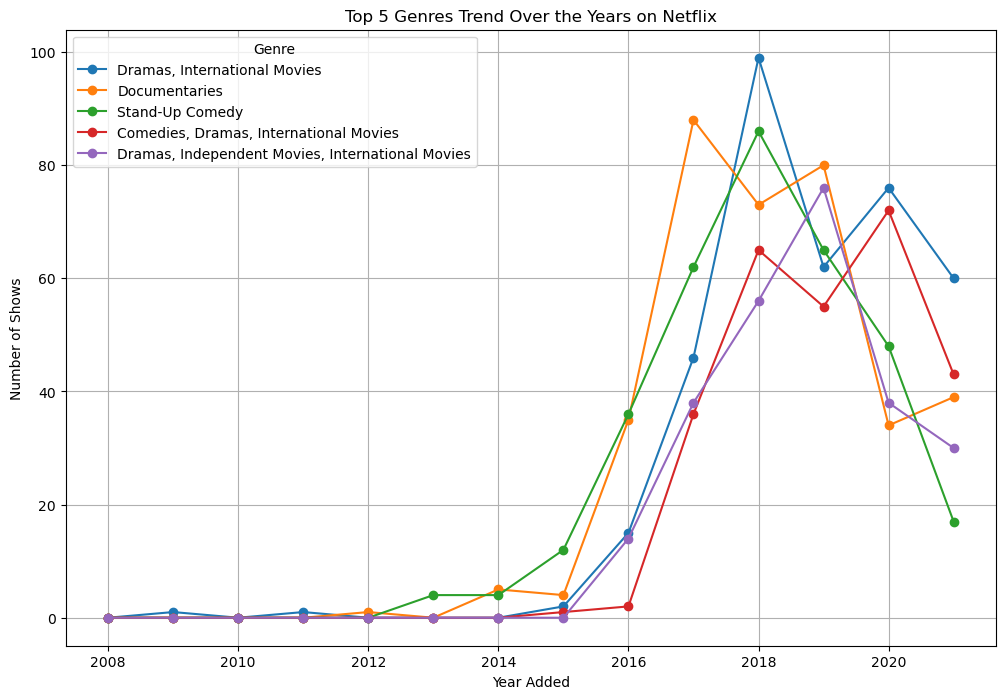

In [76]:
# Convert "date_added" column to a pandas datetime format
movies['date_added'] = pd.to_datetime(movies['date_added'])

# Extract year and month
movies['year_added'] = movies['date_added'].dt.year
movies['month_added'] = movies['date_added'].dt.month

genre_trend = movies.groupby(['year_added', 'listed_in']).size().unstack().fillna(0)

# Plot the trend of the top genres over the years
top_genres = genre_trend.sum().sort_values(ascending=False).head(5).index
genre_trend[top_genres].plot(kind='line', marker='o', figsize=(12, 8))

# Customize the plot
plt.title('Top 5 Genres Trend Over the Years on Netflix')
plt.xlabel('Year Added')
plt.ylabel('Number of Shows')
plt.legend(title='Genre', loc='upper left')
plt.grid(True)
plt.show()



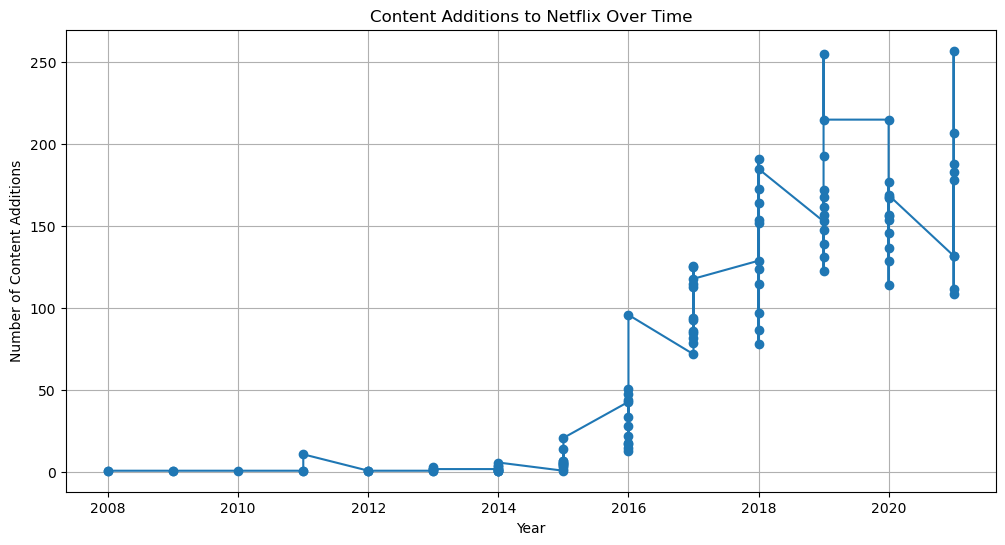

In [77]:
# Group data by year and month
content_counts = movies.groupby(['year_added', 'month_added']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
plt.plot(content_counts['year_added'], content_counts['count'], marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Content Additions')
plt.title('Content Additions to Netflix Over Time')
plt.grid(True)
plt.show()

Still to understand this graph, lol
But from my research, it generates a line plot showing the number of content additions to Netflix over time. Each data point represents the count of content additions for a specific year and month